
Testing SVM with C=0.1145

Initial learning rate γ₀=0.1
Training error: 0.1961
Test error: 0.1900
Final objective value: 52.5563


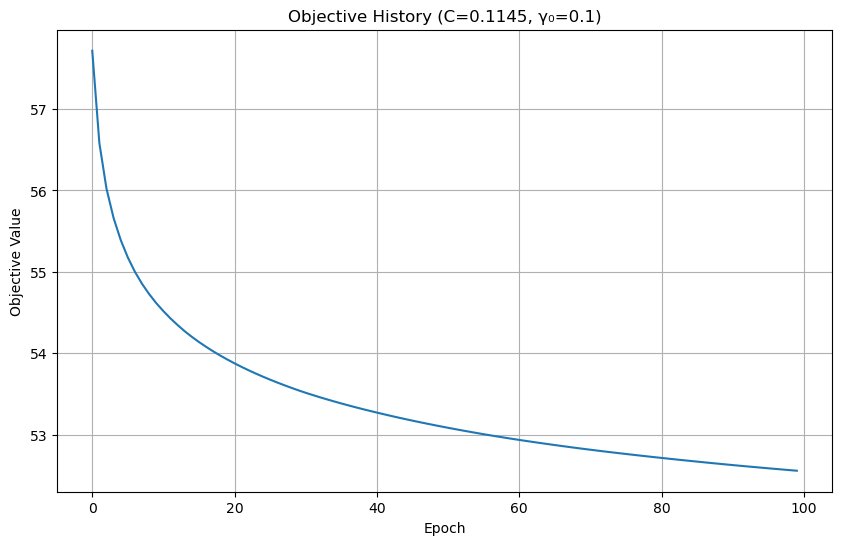


Initial learning rate γ₀=0.5
Training error: 0.1089
Test error: 0.1220
Final objective value: 46.7761


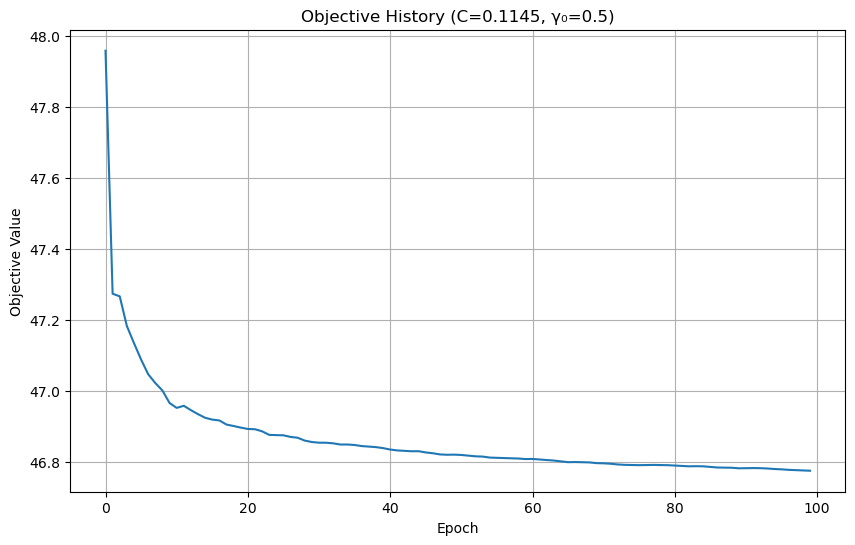


Initial learning rate γ₀=1.0
Training error: 0.1101
Test error: 0.1220
Final objective value: 46.7489


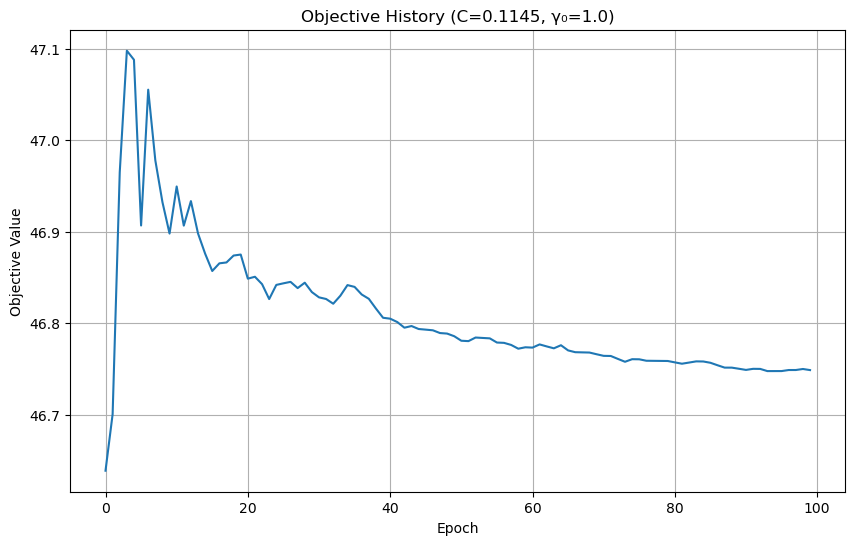


Testing SVM with C=0.5727

Initial learning rate γ₀=0.1
Training error: 0.0482
Test error: 0.0740
Final objective value: 128.0183


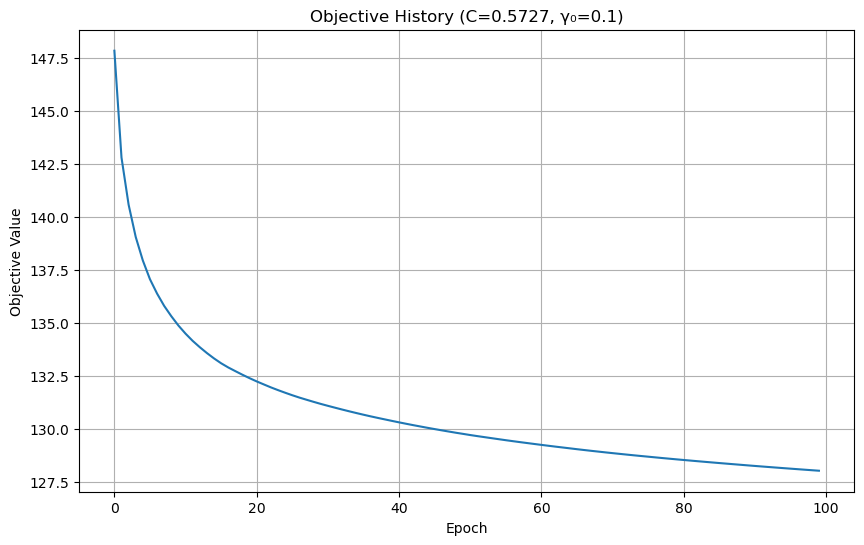


Initial learning rate γ₀=0.5
Training error: 0.0287
Test error: 0.0200
Final objective value: 78.9181


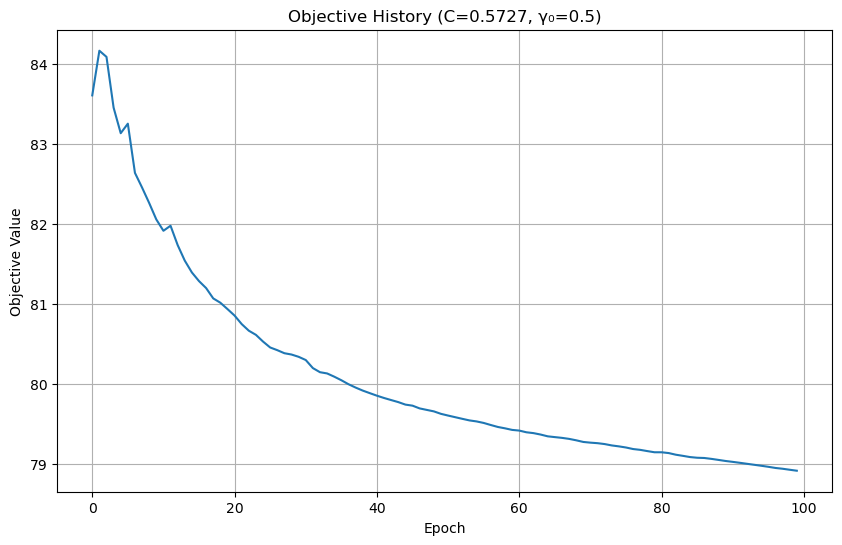


Initial learning rate γ₀=1.0
Training error: 0.0241
Test error: 0.0200
Final objective value: 75.7259


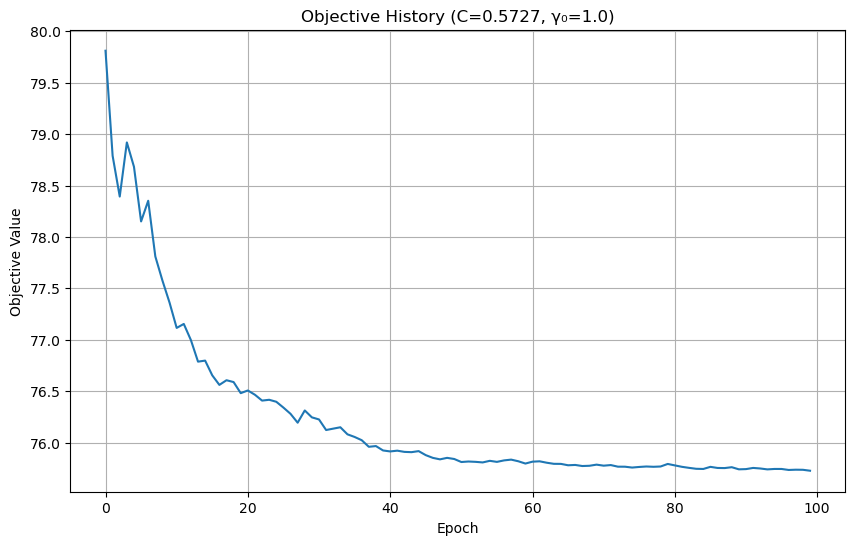


Testing SVM with C=0.8018

Initial learning rate γ₀=0.1
Training error: 0.0401
Test error: 0.0620
Final objective value: 161.5791


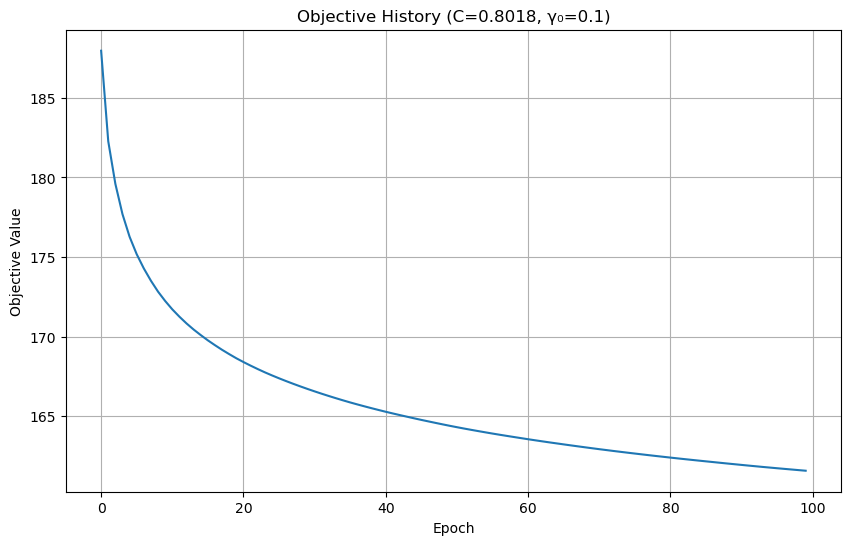


Initial learning rate γ₀=0.5
Training error: 0.0264
Test error: 0.0200
Final objective value: 100.0026


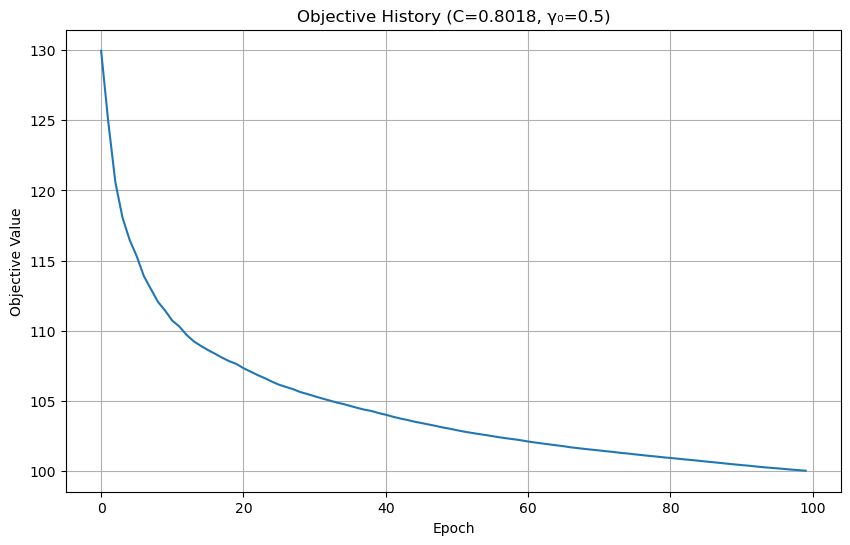


Initial learning rate γ₀=1.0
Training error: 0.0241
Test error: 0.0180
Final objective value: 91.5150


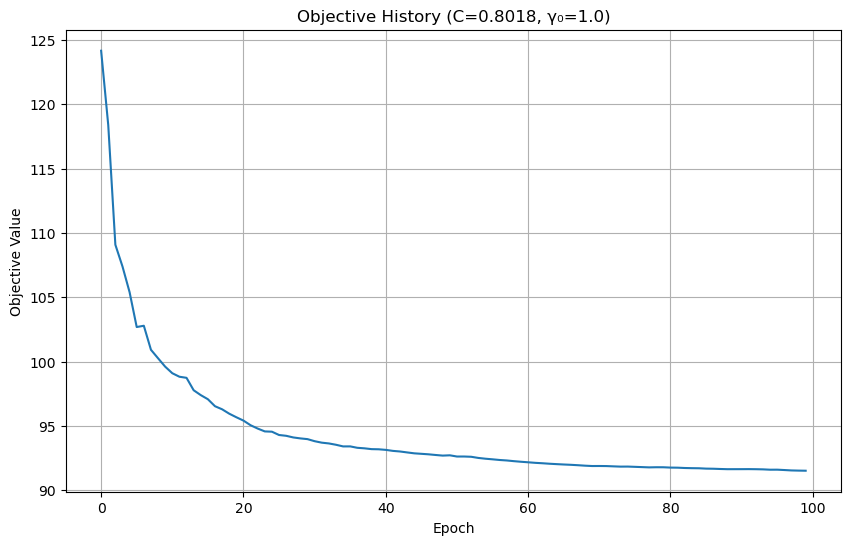


Summary of Results:
C	γ₀	Train Error	Test Error	Final Objective
------------------------------------------------------------
0.1145	0.1	0.1961		0.1900		52.5563
0.1145	0.5	0.1089		0.1220		46.7761
0.1145	1.0	0.1101		0.1220		46.7489
0.5727	0.1	0.0482		0.0740		128.0183
0.5727	0.5	0.0287		0.0200		78.9181
0.5727	1.0	0.0241		0.0200		75.7259
0.8018	0.1	0.0401		0.0620		161.5791
0.8018	0.5	0.0264		0.0200		100.0026
0.8018	1.0	0.0241		0.0180		91.5150


In [1]:
import numpy as np
from typing import Tuple
import matplotlib.pyplot as plt

class SVM:
    def __init__(self, C: float, gamma0: float, max_epochs: int = 100):
        """
        Initialize SVM with stochastic sub-gradient descent.
        
        Args:
            C: Regularization parameter
            gamma0: Initial learning rate
            max_epochs: Maximum number of epochs
        """
        self.C = C
        self.gamma0 = gamma0
        self.max_epochs = max_epochs
        self.w = None
        self.b = 0
        self.objective_history = []
        
    def _learning_rate(self, t: int) -> float:
        """Calculate learning rate at step t using schedule γₜ = γ₀/(1 + t)"""
        return self.gamma0 / (1 + t)
    
    def _calculate_objective(self, X: np.ndarray, y: np.ndarray) -> float:
        """Calculate the SVM objective function value"""
        # Regularization term
        reg_term = 0.5 * np.sum(self.w ** 2)
        
        # Hinge loss term
        margins = y * (X.dot(self.w) + self.b)
        hinge_losses = np.maximum(0, 1 - margins)
        hinge_term = self.C * np.sum(hinge_losses)
        
        return reg_term + hinge_term
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Train the SVM using stochastic sub-gradient descent.
        
        Args:
            X: Training features (n_samples, n_features)
            y: Training labels {-1, 1} (n_samples,)
        """
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        t = 0  # Step counter
        
        for epoch in range(self.max_epochs):
            # Shuffle the training data
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            
            for i in range(n_samples):
                t += 1
                gamma_t = self._learning_rate(t)
                
                # Calculate margin for current example
                margin = y_shuffled[i] * (X_shuffled[i].dot(self.w) + self.b)
                
                # Update weights and bias if margin < 1
                if margin < 1:
                    self.w = (1 - gamma_t) * self.w + gamma_t * self.C * y_shuffled[i] * X_shuffled[i]
                    self.b += gamma_t * self.C * y_shuffled[i]
                else:
                    self.w = (1 - gamma_t) * self.w
            
            # Record objective value after each epoch
            obj_value = self._calculate_objective(X, y)
            self.objective_history.append(obj_value)
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """Make predictions for test data."""
        return np.sign(X.dot(self.w) + self.b)
    
    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """Calculate accuracy score."""
        return np.mean(self.predict(X) == y)

def load_and_preprocess_data(train_path: str, test_path: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Load and preprocess the banknote data."""
    train_data = np.loadtxt(train_path, delimiter=',')
    test_data = np.loadtxt(test_path, delimiter=',')
    
    X_train, y_train = train_data[:, :-1], train_data[:, -1]
    X_test, y_test = test_data[:, :-1], test_data[:, -1]
    
    # Convert labels to {-1, 1}
    y_train = 2 * y_train - 1
    y_test = 2 * y_test - 1
    
    return X_train, y_train, X_test, y_test

def plot_objective_history(objective_history: list, title: str = "Objective Function History"):
    """Plot the objective function value over epochs."""
    plt.figure(figsize=(10, 6))
    plt.plot(objective_history)
    plt.xlabel('Epoch')
    plt.ylabel('Objective Value')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Example usage
if __name__ == "__main__":
    # Load and preprocess data
    X_train, y_train, X_test, y_test = load_and_preprocess_data('train.csv', 'test.csv')
    
    # Define C values to test
    C_values = [100/873, 500/873, 700/873]
    
    # Test different initial learning rates
    gamma0_values = [0.1, 0.5, 1.0]
    
    results = []
    
    for C in C_values:
        print(f"\nTesting SVM with C={C:.4f}")
        
        for gamma0 in gamma0_values:
            print(f"\nInitial learning rate γ₀={gamma0}")
            
            # Initialize and train SVM
            svm = SVM(C=C, gamma0=gamma0)
            svm.fit(X_train, y_train)
            
            # Calculate errors
            train_error = 1 - svm.score(X_train, y_train)
            test_error = 1 - svm.score(X_test, y_test)
            
            results.append({
                'C': C,
                'gamma0': gamma0,
                'train_error': train_error,
                'test_error': test_error,
                'final_objective': svm.objective_history[-1]
            })
            
            print(f"Training error: {train_error:.4f}")
            print(f"Test error: {test_error:.4f}")
            print(f"Final objective value: {svm.objective_history[-1]:.4f}")
            
            # Plot objective function history
            plot_objective_history(
                svm.objective_history, 
                f"Objective History (C={C:.4f}, γ₀={gamma0})"
            )
    
    # Print summary table
    print("\nSummary of Results:")
    print("C\tγ₀\tTrain Error\tTest Error\tFinal Objective")
    print("-" * 60)
    for result in results:
        print(f"{result['C']:.4f}\t{result['gamma0']:.1f}\t{result['train_error']:.4f}\t\t{result['test_error']:.4f}\t\t{result['final_objective']:.4f}")